**Linear Regression**

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Download Dataset of weight, height
!wget https://www.innovacademy.com/my_resources/weight_height.csv

--2022-02-21 10:54:51--  https://www.innovacademy.com/my_resources/weight_height.csv
Resolving www.innovacademy.com (www.innovacademy.com)... 108.167.158.160
Connecting to www.innovacademy.com (www.innovacademy.com)|108.167.158.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168901 (165K) [text/csv]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 164.94K   292KB/s    in 0.6s    

2022-02-21 10:54:53 (292 KB/s) - ‘weight_height.csv’ saved [168901/168901]



In [3]:
#Read Dataset
df = pd.read_csv('weight_height.csv')
df

,Talla (cm),Peso (Kg)
0,187.571423,109.819678
1,174.706036,73.688955
2,188.239668,96.584348
3,182.196685,99.899282
4,177.499761,93.682809
...,...,...
4995,174.904559,80.417498
4996,175.192494,72.315494
4997,170.215039,90.434712
4998,181.756605,84.401283


In [4]:
#Set data to X and y
data = df.values
X, y = data[:,0].reshape(-1, 1), data[:, 1].reshape(-1, 1)
print('Elements of X:\n', X[:10])
print('Elements of y:\n', y[:10])

Elements of X:
 [[187.57142322]
 [174.70603628]
 [188.2396677 ]
 [182.19668514]
 [177.49976149]
 [170.82265985]
 [174.71410638]
 [173.6052294 ]
 [170.22813214]
 [161.17949471]]
Elements of y:
 [[109.81967768]
 [ 73.68895452]
 [ 96.58434842]
 [ 99.89928152]
 [ 93.68280948]
 [ 69.10431871]
 [ 83.50326143]
 [ 76.25888416]
 [ 79.87196594]
 [ 71.00545308]]


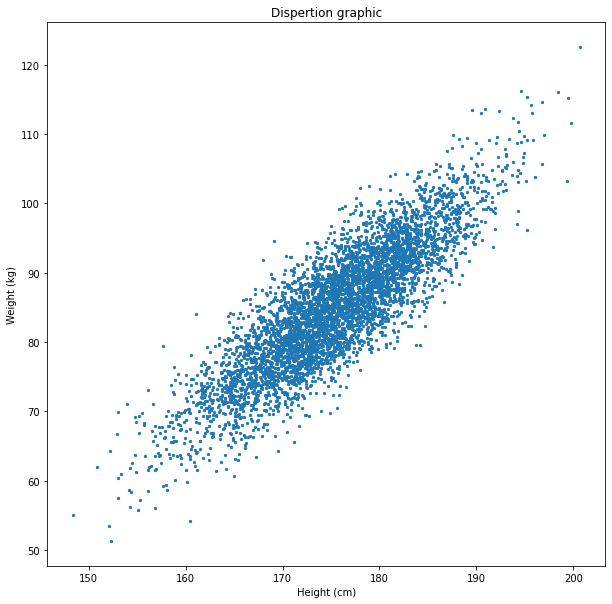

In [5]:
#Visualize data
plt.figure(figsize=(10, 10))
plt.title('Dispertion graphic')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.scatter(X, y, s=5)

In [6]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

***Linear Rergression Code***

In [7]:
#Create a vector of ones
ones = np.ones((X.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [8]:
#Stack ones vector to X matrix set
X_stacked = np.hstack((ones, X))
X_stacked

array([[  1.        , 187.57142322],
       [  1.        , 174.70603628],
       [  1.        , 188.2396677 ],
       ...,
       [  1.        , 170.21503922],
       [  1.        , 181.75660496],
       [  1.        , 178.69377489]])

In [9]:
#Define train function
def train(X, y):
  ones = np.ones((X.shape[0], 1))
  X_stacked = np.hstack((ones, X))
  XTX = X_stacked.T @ X_stacked
  XT = X_stacked.T
  return np.linalg.inv(XTX) @ XT @ y

In [10]:
#We call train function to get model parameters
W = train(X_train, y_train)
w, b = W[1][0], W[0][0]
print('W=', W, '\n w=', w, '\n b=', b)

W= [[-101.30451024]
 [   1.06212716]] 
 w= 1.0621271612723384 
 b= -101.30451024294338


In [11]:
#Define prediction function
def predict(W, X):
  ones = np.ones((X.shape[0], 1))
  X_stacked = np.hstack((ones, X))
  return X_stacked @ W

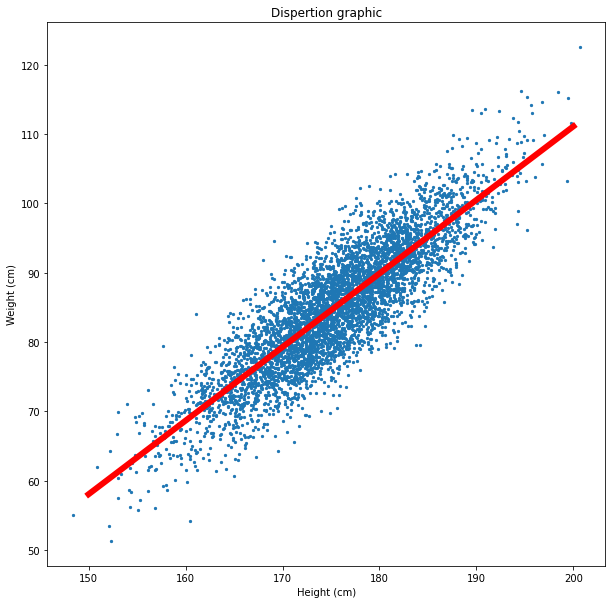

In [12]:
plt.figure(figsize=(10,10))
plt.title('Dispertion graphic')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (cm)')
plt.scatter(X, y, s=5)

x1 = 150
x2 = 200

#Predict and fit best line
y1 = w * x1 + b
y2 = w * x2 + b

X_line = [x1, x2]
Y_line = [y1, y2]

plt.plot(X_line, Y_line, linewidth=6, color='red')

In [14]:
#Predict and test the model
r2_score(y_test, predict(W, X_test))

0.7450183290546492

In [15]:
#Trying some values with height
height1 = 140
height2 = 150

print('Corresponding weight to height', height1, 'is', predict(W, np.array([[height1]]))[0][0])
print('Corresponding weight to height', height2, 'is', predict(W, np.array([[height2]]))[0][0])

Corresponding weight to height 140 is 47.393292335184
Corresponding weight to height 150 is 58.01456394790738


**Multivariable Linear Regression**

In [17]:
#Import dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip
!unzip CCPP.zip

--2022-02-21 11:06:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3674852 (3.5M) [application/x-httpd-php]
Saving to: ‘CCPP.zip.1’

CCPP.zip.1          100%[===================>]   3.50M  3.00MB/s    in 1.2s    

2022-02-21 11:06:46 (3.00 MB/s) - ‘CCPP.zip.1’ saved [3674852/3674852]

Archive:  CCPP.zip
   creating: CCPP/
  inflating: CCPP/Folds5x2_pp.ods    
  inflating: CCPP/Folds5x2_pp.xlsx   
  inflating: CCPP/Readme.txt         
  inflating: CCPP/Readme.txt~        


In [18]:
#Read dataset
df_multi = pd.read_excel('CCPP/Folds5x2_pp.xlsx')
df_multi

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [19]:
#Assign values to feature matrix X and labels y
X, y = df_multi.values[:,:-1], df_multi.values[:,-1]

In [20]:
#Normilize values in a range of 0-1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, shuffle=True)

In [23]:
#Train the model to find parameters
W = train(X_train, y_train)
W

array([ 4.54354836e+02, -1.50998289e+01, -2.74424929e+00,  3.19308690e-01,
       -2.44398966e+00])

In [24]:
#Test the model
r2_score(y_test, predict(W, X_test))

0.9265621794634145

**Linear Regression with SKLearn**

In [26]:
#Import module Linear Regression
from sklearn.linear_model import LinearRegression

In [27]:
#Instantiate the model and fit parameters
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
#Predict
lr.predict(scaler.transform(np.array([[32, 27.5, 1024, 50.5]])))

array([439.51785109])